# Optimization notes

This file contains notes about derivatives.

More info (KA): https://www.khanacademy.org/math/calculus-all-old/taking-derivatives-calc?ref=resume_learning#intro-to-diff-calculus-calc

----

# The Impact of a Parameter on the output

The following cells contains examples showing what is meant by the "impact" a parameter has on a function's output

[0 1 2 3 4]
[0 2 4 6 8]


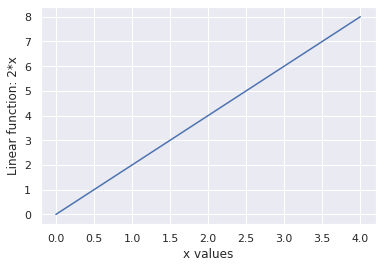

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()


def f(x):
    return 2*x

# create an array with values of range 0-4
x = np.arange(5)

# function output for each value in x
y = f(x)

print(x,y,sep="\n")

plt.plot(x,y)
plt.xlabel("x values")
plt.ylabel("Linear function: 2*x", )
plt.show()

## The Slope

In order to find the **impact a parameter has on a function**, one must take the `slope` of the function (a.k.a. the line the function forms)

In other words, the `slope` describes the **impact** that $x$ has on $y$

The `slope` is the **change in y** divided by the **change in x** (`Rise over run`):

<font size="5">$\frac{Change \;in \; y}{Change \; in \; x} = \frac{\Delta y}{\Delta x}$</font>

To `calculate the slope`, we must take any two points on our function's line and **subtract them**:

$p_1 = [0,0]$\
$p_2 = [1,2]$

$\Delta x = p_{2x} - p_{1x} = 1 - 0 = 1$\
$\Delta y = p_{2y} - p_{1y} = 2 - 0 = 2$

<font size="5">$slope = \frac{\Delta y}{\Delta x} = \frac{2}{1}$ = 2 </font>

In [18]:

print(f"Values:\nx:{x}\ny:{y}")

# calculate the slop using two random points from the line(function)
delta_y = y[1] - y[2]
delta_x = x[1] - x[2]

slope = delta_y / delta_x
print(f"Slope: {slope}")


Values:
x:[0 1 2 3 4]
y:[0 2 4 6 8]
Slope: 2.0


The results above show that the measure of impact $x$ has on $y$ is `2`

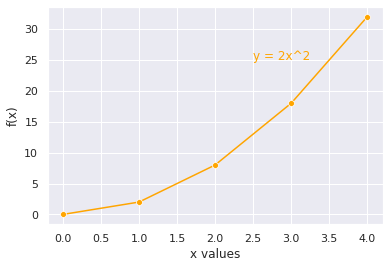

In [19]:
def f(x):
    return 2*x**2

y = f(x)

sns.lineplot(x=x,y=y, color="orange", marker="o")
plt.text(2.5,25, "y = 2x^2", color="orange")
plt.ylabel("f(x)")
plt.xlabel("x values")
plt.show()

The `parabola` above is non-linear. Can we still take it's slope?

Well, yes. However, the `slope` will change **depending on which points we choose**

Values:
x:[0 1 2 3 4]
y:[ 0  2  8 18 32]
~~~~~~~~~~
Slope: 2.0
Slope: 10.0


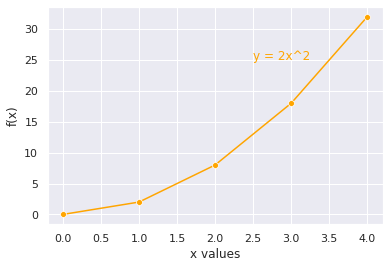

In [20]:
print(f"Values:\nx:{x}\ny:{y}\n{'~'*10}")

# calculate the slop using two random points from the line(function)
delta_y = y[1] - y[0]
delta_x = x[1] - x[0]

slope1 = delta_y / delta_x
print(f"Slope: {slope1}")

delta_y = y[3] - y[2]
delta_x = x[3] - x[2]

slope2 = delta_y / delta_x
print(f"Slope: {slope2}")


sns.lineplot(x=x,y=y, color="orange", marker="o")
plt.text(2.5,25, "y = 2x^2", color="orange")
plt.ylabel("f(x)")
plt.xlabel("x values")
plt.show()


From the plot above, we can see that the slope is constantly changing. So how do we measure the impact that $x$ has on $y$ for a `nonlinear` function?

## Derivatives

According to **calculus**, we must measure the slope of the `tangent line` at $x$ (for a specific input value), which gives us the `instantaneous slope` (slope at this point), which is the ~**`derivative`**~. So:

- **Slope of tangent line** ==  `derivative`

    A `tangent line` is a line which locally **touches a curve** at `one and only one point`

    The `tangent line` is calculated by **drawing a line between two points** `"infinitely close"` on a curve, but the curve has to be *differentiable at the derivation point*.

In other words, the curve has to be **continuous and smooth** and because this is a curve, **there is no single slope**. 

To give an immediate example, we can approximate a `derivative` of the function at $x$ by using this point and another one also taken at $x$, but with a \
**very small delta added to it**, such as $0.0001$. This number is a common choice because it does **not introduce too large an error**.

Since we can't choose an *infinitely* small number in code, we choose a `sufficiently small` one like $0.0001$


In [21]:
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta

y1 = f(x1) # result at the derivation point
y2 = f(x2) # result at the other, close point

approximate_derivative = (y2-y1) / (x2-x1)

print(approximate_derivative)

4.0001999999987845


The `derivative` of $2x^2$ at $x=1$ is exactly 4, and the approximation above came very close, with the only difference being in how we calculated the tangent.

Concerning the delta:
- We can't choose an **extremely small value** because of `floating-point precision errors` 
- But the value needs to be **large enough** to avoid `rounding errors`
- $0.0001$ is a common choice (**is this the learning rate in NNs???**)

`Numerical differentiation` is the process of finding the numerical value of a derivative of a given function at a given point.
- (i.e. calculating the **slope of the tangent line** using two *infinitely* close points)

The **closer the two points are** for calculating the **slope of the tangent line**, the `more correct` the tangent line appears to be.

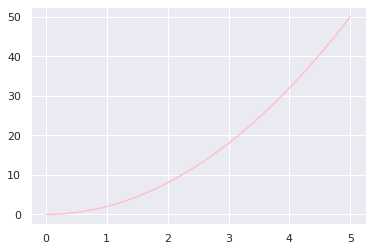

In [22]:
def f(x):
    return 2*x**2

x = np.arange(0,5,0.0001)
y = f(x)

sns.lineplot(x=x, y=y, color="pink")
plt.show()

To draw these `tangent lines`, we will derive the function for the tangent line at a point and plot it on the graph at that point.

The function for a straight line is $y = mx + b$, where:

- `m` is the `slope` or the *approximate_derivative* we've already calculated
- `x` is the input
- `b` is the y-intercept, which **we need to calculate**

To calculate $b$, the formula is: $\:b = y-mx$

Points: (2, 8) (2.0001, 8.000800020000002)
 Approximate derivative for f(x), where x = 2 is 8.000199999998785


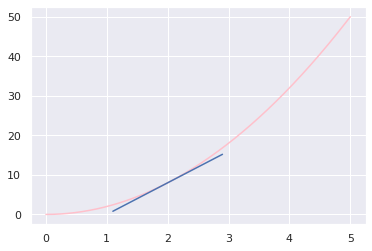

In [23]:
x = np.arange(0,5,0.0001)
y = f(x)

plt.plot(x, y, color="pink")



f = lambda x: 2*x**2

p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta
y1 = f(x1) 
y2 = f(x2) 
print("Points:",(x1,y1), (x2,y2))

# derivative approximation
approximate_derivative = (y2-y1) / (x2-x1)

# y-intercept for the tangent line
# b = y - m*x
b = y2 - (approximate_derivative * x2)

# put the tangent line calculation into a func in order to call it multiple times for different values of x
# approximate_derivative and b are constant for given function
tangent_line = lambda x: (approximate_derivative * x) + b

# plotting the tangent line
# +/- 0.9 to draw the tangent line on our graph
# then we can calculate the y for given x using tangent line function

to_plot = [x1-0.9, x1, x1+0.9] # the +/- 0.9 here extends the line so we can see it clearer
plt.plot(to_plot, [tangent_line(i) for i in to_plot])

print(f" Approximate derivative for f(x), where x = {x1} is {approximate_derivative}")
plt.show()

The blue line above is the `approximate tangent line` at $x=2$ for the function $f(x) = 2x^2$. 

We generally only care about the **`slope of the tangent line`** because it informs us about the _impact_ that $x$ has on this function at a particular point, referred to as the `instantaneous rate of change`.


The code below shows various tangent lines calculated for different points.

Function: f(x) = 2*x**2

Points: (0, 0) (0.0001, 2e-08)
 Approximate derivative for f(x), where x = 0 is 0.00019999999999999998
Points: (1, 2) (1.0001, 2.00040002)
 Approximate derivative for f(x), where x = 1 is 4.0001999999987845
Points: (2, 8) (2.0001, 8.000800020000002)
 Approximate derivative for f(x), where x = 2 is 8.000199999998785
Points: (3, 18) (3.0001, 18.001200020000002)
 Approximate derivative for f(x), where x = 3 is 12.000199999998785
Points: (4, 32) (4.0001, 32.00160002)
 Approximate derivative for f(x), where x = 4 is 16.000200000016548


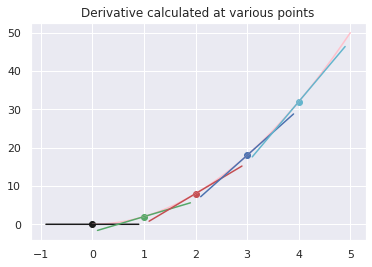

In [27]:
f = lambda x: 2*x**2

x = np.arange(0,5,0.0001)
y = f(x)
plt.plot(x, y, color="pink")

colors = ["k", "g", "r", "b", "c"]

def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative * x) + b

print("Function: f(x) = 2*x**2\n")
for i in range(5):
    
    p2_delta = 0.0001
    x1 = i
    x2 = x1 + p2_delta
    
    y1 = f(x1) 
    y2 = f(x2) 
    print("Points:",(x1,y1), (x2,y2))
    
    approximate_derivative = (y2 - y1) / (x2 - x1)
    b = y2 - (approximate_derivative * x2) # b = y - m*x
    
    to_plot = [x1-0.9, x1, x1+0.9]
    
    plt.scatter(x1, y1, c=colors[i])
    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative) for point in to_plot],
             c=colors[i])
    
    print(f" Approximate derivative for f(x), where x = {x1} is {approximate_derivative}")

plt.title("Derivative calculated at various points") 
plt.show()
    
    

For the simple function $f(x) = 2x^2$, we didn't pay a high penalty for **approximating the derivative** (slope of the tangent line) like this,\
and received a value close enough for our needs.

------

The problem with using this method for neural networks is that the `loss function` is a **massive** function with many, many parameters and also operates in multiple dimensions.

Using this method of **numerical differentiation** would be very time consuming, and also can be thought of as *brute forcing the derivatice calculations*.

To calculate the slopes for the `loss function`, we need a **multivariate function**, which a function that takes multiple parameters.

This is where **`partial derivatives`** come in!